## Introduction
This is not a detailed document about time series models , there are factors that effect the predictions in a crucial way like ( **trends**, **seasonality**, **stationarity** ) but we're not going through them .

We'll just go through some functional examples of the models visualize the results.

In [1]:
import shutup
shutup.please()

### Reading and plotting Dataset

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as mape

df = pd.read_csv(r'data\dataFinalMEANDate.csv',index_col="Unnamed: 0", parse_dates=True)
df.head()

,Computer Network Support Specialists,Database and Systems Administrators and Network Architects,Computer Network Architects,Software Developers and Programmers,Information Security Analysts,Computer User Support Specialists,Computer Occupations,Computer Programmers,Database Administrators,Computer Systems Analysts,"Software Developers, Applications",Network and Computer Systems Administrators,Computer and Information Research Scientists,Computer Support Specialists,"Computer Occupations, All Other"
2011-01-01,585,2191,40,6055,40,1284,40,88,40,659,87,155,340,1027,117
2011-02-01,769,3842,40,6431,40,1404,40,192,40,1163,88,739,371,1316,174
2011-03-01,908,3851,140,7564,140,1766,140,525,40,1249,476,759,378,1559,175
2011-04-01,969,3948,140,8290,140,1849,140,676,50,1432,1258,873,378,1583,177
2011-05-01,975,3991,143,8520,143,1940,143,682,116,1602,1275,953,378,1768,180


<AxesSubplot:>

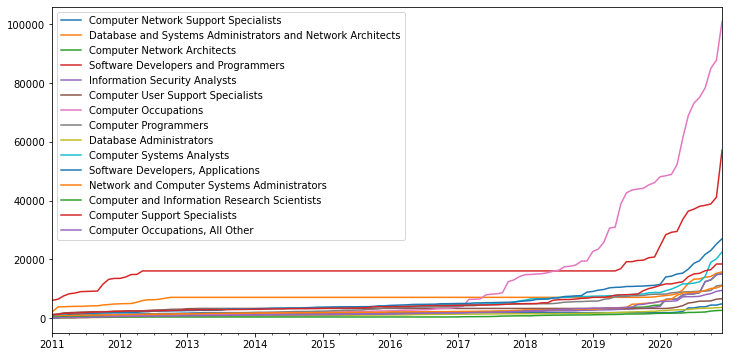

In [3]:
df.plot(figsize=(12,6))

### Select a single column since the models are univariate

In [4]:
X = df.iloc[:,1]
X.head()
index = X.index

# check if there are any missing values
print(X.isna().sum())

0


### Time Series Models (Forecasting)
**Autoregression (AR)**

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is suitable for univariate time series without trend and seasonal components.

In [5]:
from statsmodels.tsa.ar_model import AutoReg
ARM = AutoReg(X, lags=0)
ARRes = ARM.fit()
print(ARRes.summary())

                                                AutoReg Model Results                                                 
Dep. Variable:     Database and Systems Administrators and Network Architects   No. Observations:                  120
Model:                                                             AutoReg(0)   Log Likelihood               -1083.091
Method:                                                       Conditional MLE   S.D. of innovations           2011.867
Date:                                                        Sun, 01 May 2022   AIC                             15.247
Time:                                                                20:46:28   BIC                             15.293
Sample:                                                            01-01-2011   HQIC                            15.266
                                                                 - 12-01-2020                                         
                 coef    std err          z     

#### Check the Mean Absolute Percentage Error (MAPE)

In [6]:
ARPred = ARRes.predict(start=index[0], end=index[len(index)-1])
print(mape(X, ARPred))


0.1413129892843657


### plot results with further forecasting

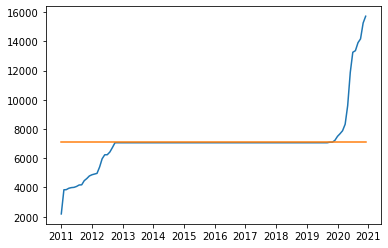

In [7]:
plt.plot(index, X, label='Original')
plt.plot(index, ARPred, label='Predicted')

**Moving Average (MA)**

The moving average (MA) method models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.

A moving average model is different from calculating the moving average of the time series.

The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q). For example, MA(1) is a first-order moving average model.

The method is suitable for univariate time series without trend and seasonal components.

In [8]:
from statsmodels.tsa.arima.model import ARIMA
MAM = ARIMA(X, order=(0,0,1))
MARes = MAM.fit()
print(MARes.summary())

                                                   SARIMAX Results                                                    
Dep. Variable:     Database and Systems Administrators and Network Architects   No. Observations:                  120
Model:                                                         ARIMA(0, 0, 1)   Log Likelihood               -1010.396
Date:                                                        Sun, 01 May 2022   AIC                           2026.791
Time:                                                                20:46:29   BIC                           2035.154
Sample:                                                            01-01-2011   HQIC                          2030.187
                                                                 - 12-01-2020                                         
Covariance Type:                                                          opg                                         
                 coef    std err          z     

In [9]:
MAPred = MARes.predict(start=index[0], end=index[len(index)-1])
print(mape(X, MAPred))

0.09367601647344106


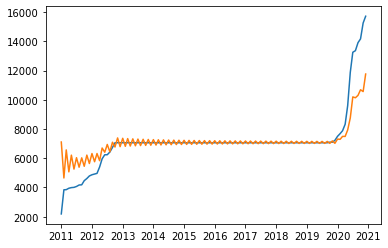

In [10]:
plt.plot(index, X, label='Original')
plt.plot(index, MAPred, label='Predicted')

### Autoregressive Moving Average (ARMA)

The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.

The method is suitable for univariate time series without trend and seasonal components.

In [11]:
ARMAM = ARIMA(X, order=(1,0,1))
ARMARes = ARMAM.fit()
print(ARMARes.summary())

                                                   SARIMAX Results                                                    
Dep. Variable:     Database and Systems Administrators and Network Architects   No. Observations:                  120
Model:                                                         ARIMA(1, 0, 1)   Log Likelihood                -849.705
Date:                                                        Sun, 01 May 2022   AIC                           1707.410
Time:                                                                20:46:30   BIC                           1718.560
Sample:                                                            01-01-2011   HQIC                          1711.938
                                                                 - 12-01-2020                                         
Covariance Type:                                                          opg                                         
                 coef    std err          z     

In [12]:
ARMAPred = ARMARes.predict(start=index[0], end=index[len(index)-1])
print(mape(X, ARMAPred))

0.035660261203230584


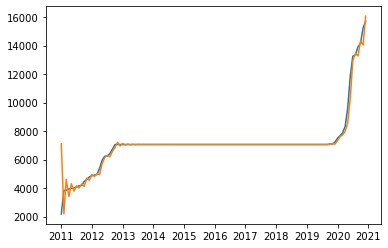

In [13]:
plt.plot(index, X, label='Original')
plt.plot(index, ARMAPred, label='Predicted')

### Autoregressive Integrated Moving Average (ARIMA)

The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

The method is suitable for univariate time series with trend and without seasonal components.

In [14]:
ARIMAM = ARIMA(X, order=(1,1,1))
ARIMARes = ARIMAM.fit()
print(ARIMARes.summary())

                                                   SARIMAX Results                                                    
Dep. Variable:     Database and Systems Administrators and Network Architects   No. Observations:                  120
Model:                                                         ARIMA(1, 1, 1)   Log Likelihood                -829.056
Date:                                                        Sun, 01 May 2022   AIC                           1664.111
Time:                                                                20:46:31   BIC                           1672.449
Sample:                                                            01-01-2011   HQIC                          1667.497
                                                                 - 12-01-2020                                         
Covariance Type:                                                          opg                                         
                 coef    std err          z     

In [15]:
ARIMAPred = ARIMARes.predict(start=index[0], end=index[len(index)-1])
print(mape(X, ARIMAPred))

0.02282182299929786


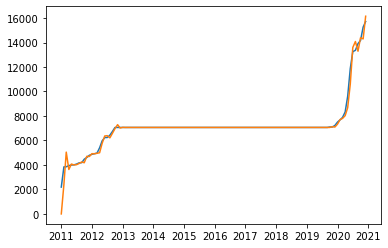

In [16]:
plt.plot(index, X, label='Original')
plt.plot(index, ARIMAPred, label='Predicted')

### Seasonal Autoregressive Integrated Moving-Average (SARIMA)

The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.

The method is suitable for univariate time series with trend and/or seasonal components.

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
SARIMAM = SARIMAX(X, order=(1,1,1), seasonal_order=(0, 0, 0, 0))
SARIMARes = SARIMAM.fit()
print(SARIMARes.summary())

                                                   SARIMAX Results                                                    
Dep. Variable:     Database and Systems Administrators and Network Architects   No. Observations:                  120
Model:                                                       SARIMAX(1, 1, 1)   Log Likelihood                -829.056
Date:                                                        Sun, 01 May 2022   AIC                           1664.111
Time:                                                                20:46:32   BIC                           1672.449
Sample:                                                            01-01-2011   HQIC                          1667.497
                                                                 - 12-01-2020                                         
Covariance Type:                                                          opg                                         
                 coef    std err          z     

In [18]:
SARIMAPred = SARIMARes.predict(start=index[0], end=index[len(index)-1])
print(mape(X, SARIMAPred))

0.02282182299929786


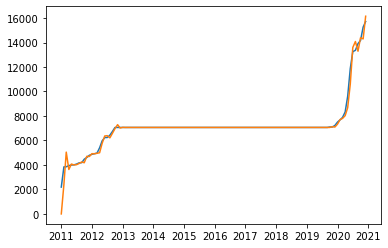

In [19]:
plt.plot(index, X, label='Original')
plt.plot(index, SARIMAPred, label='Predicted')

### Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

The Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) is an extension of the SARIMA model that also includes the modeling of exogenous variables.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series may be referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The SARIMAX method can also be used to model the subsumed models with exogenous variables, such as ARX, MAX, ARMAX, and ARIMAX.

The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.


In [20]:
exog = df.iloc[:,2]
SARIMAXM = SARIMAX(X, order=(1,1,1), seasonal_order=(0, 0, 0, 0), exog=exog)
SARIMAXRes = SARIMAXM.fit()
print(SARIMAXRes.summary())

                                                   SARIMAX Results                                                    
Dep. Variable:     Database and Systems Administrators and Network Architects   No. Observations:                  120
Model:                                                       SARIMAX(1, 1, 1)   Log Likelihood                -819.879
Date:                                                        Sun, 01 May 2022   AIC                           1647.758
Time:                                                                20:46:33   BIC                           1658.875
Sample:                                                            01-01-2011   HQIC                          1652.272
                                                                 - 12-01-2020                                         
Covariance Type:                                                          opg                                         
                                  coef    std er

In [21]:
SARIMAXPred = SARIMAXRes.predict(start=index[0], end=index[len(index)-1])
print(mape(X, SARIMAXPred))

0.02583156846694944


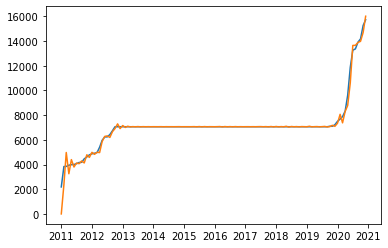

In [22]:
plt.plot(index, X, label='Original')
plt.plot(index, SARIMAXPred, label='Predicted')

### Simple Exponential Smoothing (SES)

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.

The method is suitable for univariate time series without trend and seasonal components.

In [23]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as SES
SESM = SES(X)
SESRes = SESM.fit()
print(SESRes.summary())

                                           SimpleExpSmoothing Model Results                                           
Dep. Variable:     Database and Systems Administrators and Network Architects   No. Observations:                  120
Model:                                                     SimpleExpSmoothing   SSE                       14633084.752
Optimized:                                                               True   AIC                           1409.356
Trend:                                                                   None   BIC                           1414.931
Seasonal:                                                                None   AICC                          1409.704
Seasonal Periods:                                                        None   Date:                 Sun, 01 May 2022
Box-Cox:                                                                False   Time:                         20:46:34
Box-Cox Coeff.:                                 

In [24]:
SESPred = SESRes.predict(start=index[0], end=index[len(index)-1])
print(mape(X, SESPred))

0.014893065353388309


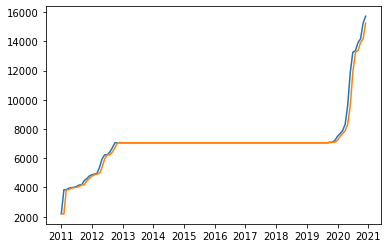

In [25]:
plt.plot(index, X, label='Original')
plt.plot(index, SESPred, label='Predicted')

### Holt Winter’s Exponential Smoothing (HWES)

The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

The method is suitable for univariate time series with trend and/or seasonal components.

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
HWESM = HWES(X)
HWESRes = HWESM.fit()
print(HWESRes.summary())

                                          ExponentialSmoothing Model Results                                          
Dep. Variable:     Database and Systems Administrators and Network Architects   No. Observations:                  120
Model:                                                   ExponentialSmoothing   SSE                       14633084.752
Optimized:                                                               True   AIC                           1409.356
Trend:                                                                   None   BIC                           1414.931
Seasonal:                                                                None   AICC                          1409.704
Seasonal Periods:                                                        None   Date:                 Sun, 01 May 2022
Box-Cox:                                                                False   Time:                         20:46:35
Box-Cox Coeff.:                                 

In [27]:
HWESPred = HWESRes.predict(start=index[0], end=index[len(index)-1])
print(mape(X, HWESPred))

0.014893065353388309


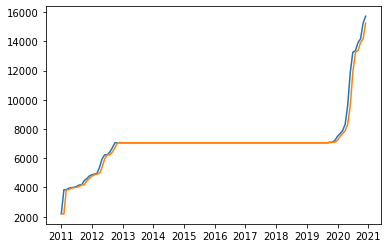

In [28]:
plt.plot(index, X, label='Original')
plt.plot(index, HWESPred, label='Predicted')

### Further Forecasting Visualisation

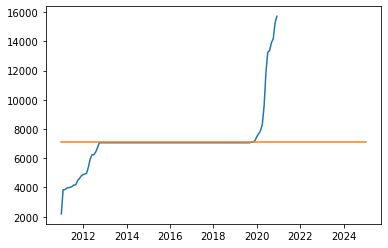

In [29]:
ARPred = ARRes.predict(start=index[0], end="2025-01-01")
plt.plot(X, label='Original')
plt.plot(ARPred, label='AR')

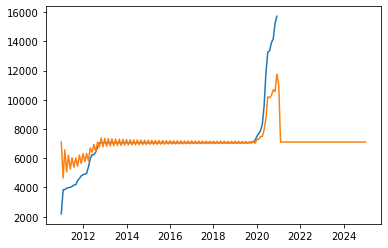

In [30]:
MAPred = MARes.predict(start=index[0], end="2025-01-01")
plt.plot(X, label='Original')
plt.plot(MAPred, label='MA')

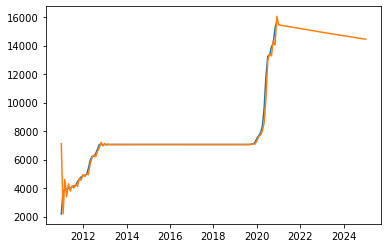

In [31]:
ARMAPred = ARMARes.predict(start=index[0], end="2025-01-01")
plt.plot(X, label='Original')
plt.plot(ARMAPred, label='ARMA')

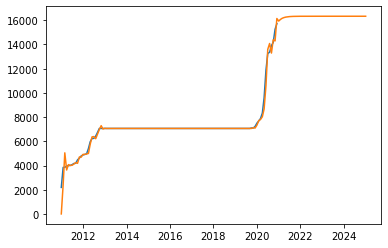

In [32]:
ARIMAPred = ARIMARes.predict(start=index[0], end="2025-01-01")
plt.plot(X, label='Original')
plt.plot(ARIMAPred, label='ARIMA')

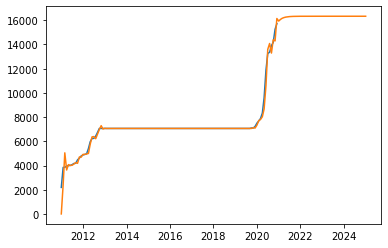

In [33]:
SARIMAPred = SARIMARes.predict(start=index[0], end="2025-01-01")
plt.plot(X, label='Original')
plt.plot(SARIMAPred, label='SARIMA')

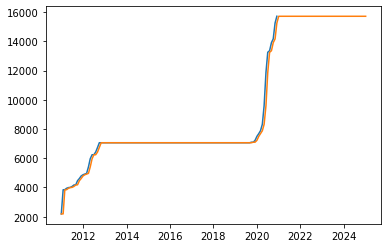

In [34]:
SESPred = SESRes.predict(start=index[0], end="2025-01-01")
plt.plot(X, label='Original')
plt.plot(SESPred, label='SES')

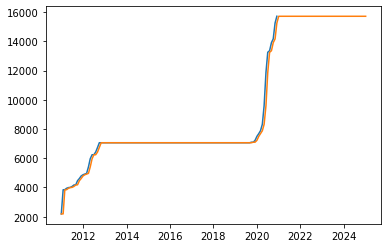

In [35]:
HWESPred = HWESRes.predict(start=index[0], end="2025-01-01")
plt.plot(X, label='Original')
plt.plot(HWESPred, label='HWES')